# Network Based Imitation

Notebook originally created to implement network based imitatation strategy model found on pages 100-103 of D. Sornette's "Why Stock Markets Crash" book. Original paper written by ... unsure will investigate later I want to start programming.

In [83]:
import warnings
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

warnings.filterwarnings('ignore')

### Definitions
* $N$ - number of traders in the network.
* $N(i)$ - number of traders directly connected to trader $i$, or simply the "neighbors" of trader $i$.
* $s_i$ - a certain trader's belief about the state of the market. Can take on two values:
  * $s_i=+1$ means the investor is feeling *good* about the market and wishes to buy.
  * $s_i=-1$ means the investor is feeling *bad* about the market and wishes to sell.
* $p(t-1)$ is the price of the asset at time $t-1$
* Price variation is then just the aggregate sum of all trader's buy/sell decisions from the previous time period $\sum_{i=1}^N s_i(t-1)$. If this sum is zero then we had an equal numbers of buyers and sellers last round.



___
I will start by generating a Barabasi-Albert Graph as this has the exponential distribution of neighbors most similar to a real world network.
* ~~This may be jumping the gun and I would want a simpler graph, model but this is where I'll start.~~

Was not jumping the gun, works great!

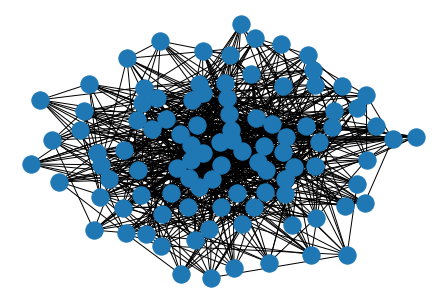

In [84]:
N = 100
trader_network = nx.barabasi_albert_graph(N, 10)
nx.draw(trader_network)

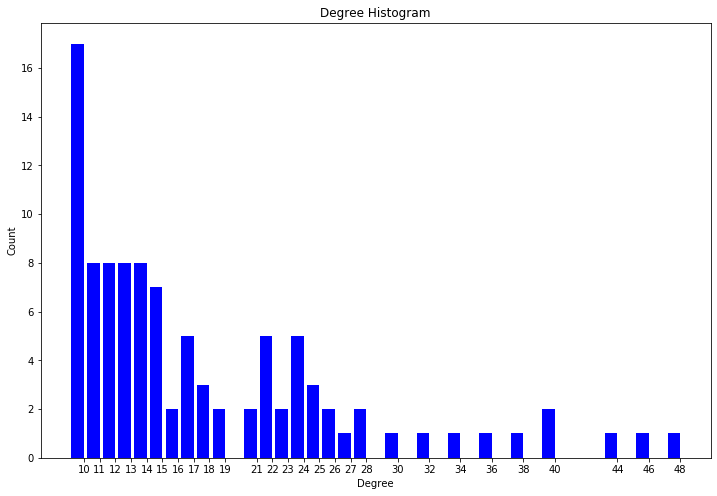

In [85]:
degrees = np.array(trader_network.degree)[:,1]
degrees = sorted(degrees, reverse=True)
degreeCount = Counter(degrees)
deg, cnt = zip(*degreeCount.items())

fig = plt.figure(figsize=(12,8))
ax = fig.gca()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree");
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg);

Now we have a graph with a decent degree distribution, let's generate random +1/-1 attributes for each of the nodes to specify "bullish" or "bearish." 

Equivalently can be thought of as $s_i=+1$ is a "buy state" and $s_i=-1$ is a "sell state."

In [86]:
random_market_beliefs = np.random.randint(2, size=N)
random_market_beliefs[random_market_beliefs == 0] = -1
trader_beliefs = dict(zip(trader_network.nodes, random_market_beliefs))
node_attrs = {trader_id : {'belief': trader_belief} for trader_id, trader_belief in trader_beliefs.items()}
nx.set_node_attributes(trader_network, node_attrs)

Check to make sure attributes were set correctly.

In [87]:
trader_network.nodes[5]['belief']

-1